# **1. Project Initialization**

# 1.1. Import Essential Libraries

All the necessary Python libraries for the project are imported. Included are pandas and numpy for data manipulation, matplotlib and seaborn for visualizations, and various modules from sklearn and xgboost for modeling and evaluation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import xgboost as xgb

# Set plot style for a consistent look
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 7) # Set default figure size

# 1.2. Load Datasets

Next, we load the training and testing data from the provided CSV files. This will form the foundation of our analysis and modeling.

In [2]:
# Load the core datasets for the project.
print("Loading train and test data...")
df_train = pd.read_csv("/kaggle/input/engage-2-value-from-clicks-to-conversions/train_data.csv")
df_test  = pd.read_csv("/kaggle/input/engage-2-value-from-clicks-to-conversions/test_data.csv")
print("Data loaded successfully.")

Loading train and test data...
Data loaded successfully.


# **2. Comprehensive Exploratory Data Analysis (EDA)**


Before we begin cleaning and modeling, it's crucial to understand the data's structure, distributions, and relationships. This section explores key aspects of the dataset to inform our feature engineering and modeling choices.

# 2.1. Initial Data Overview

Let's start by getting a high-level overview of the training data. The .info() method will show us the data types and non-null counts, while .head() gives us a glimpse of the first few rows.

In [3]:
print("First 5 Rows of the Training Data:")
display(df_train.head())

print("\n\nTraining Data Info (Data Types and Non-Nulls):")
df_train.info()

First 5 Rows of the Training Data:


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,trafficSource.isTrueDirect,purchaseValue,browser,device.screenResolution,trafficSource.adContent,trafficSource.keyword,screenSize,geoCluster,trafficSource.adwordsClickInfo.slot,device.mobileDeviceBranding,...,device.language,deviceType,userChannel,device.browserVersion,totalHits,device.screenColors,sessionStart,geoNetwork.continent,device.isMobile,new_visits
0,NaN,0.0,Edge,not available in demo dataset,NaN,NaN,medium,Region_2,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1500100799,Americas,False,1.0
1,True,0.0,Chrome,not available in demo dataset,NaN,NaN,medium,Region_3,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Direct,not available in demo dataset,1,not available in demo dataset,1495262065,Americas,False,1.0
2,True,0.0,Chrome,not available in demo dataset,NaN,(not provided),medium,Region_2,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Organic Search,not available in demo dataset,6,not available in demo dataset,1508510328,Europe,False,NaN
3,NaN,0.0,Internet Explorer,not available in demo dataset,NaN,NaN,medium,Region_4,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1483431838,Asia,False,1.0
4,True,88950000.0,Chrome,not available in demo dataset,NaN,NaN,medium,Region_3,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Direct,not available in demo dataset,66,not available in demo dataset,1475804633,Americas,False,1.0




Training Data Info (Data Types and Non-Nulls):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116023 entries, 0 to 116022
Data columns (total 52 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   trafficSource.isTrueDirect                    42890 non-null   object 
 1   purchaseValue                                 116023 non-null  float64
 2   browser                                       116023 non-null  object 
 3   device.screenResolution                       116023 non-null  object 
 4   trafficSource.adContent                       2963 non-null    object 
 5   trafficSource.keyword                         44162 non-null   object 
 6   screenSize                                    116023 non-null  object 
 7   geoCluster                                    116023 non-null  object 
 8   trafficSource.adwordsClickInfo.slot           4281 non-null    object 
 9  

# 2.2. Target Variable: purchaseValue

Understanding the target variable is the most important part of any regression task. Many sessions do not result in a purchase, leading to a purchaseValue of NaN or 0. We'll analyze the distribution of sessions that did result in a purchase.

Percentage of sessions with a purchase: 20.67%


/tmp/ipykernel_13/93777905.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  eda_df['purchaseValue'].fillna(0, inplace=True)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


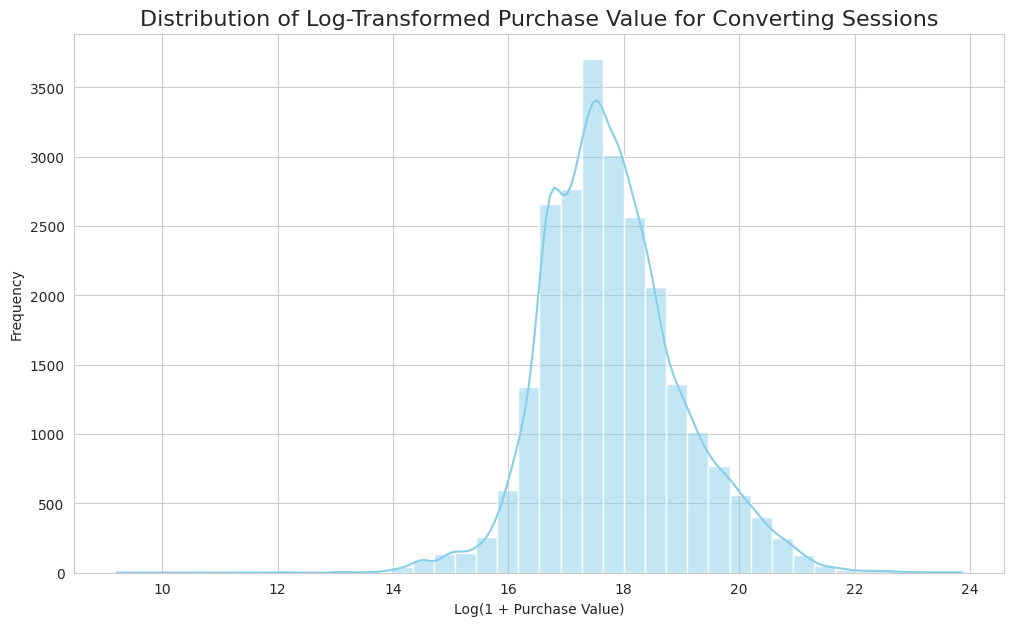

In [4]:
# Create a copy and fill NaNs to analyze the target variable
eda_df = df_train.copy()
eda_df['purchaseValue'].fillna(0, inplace=True)

# Calculate the percentage of sessions with a purchase
purchase_sessions_percentage = (eda_df['purchaseValue'] > 0).mean() * 100

print(f"Percentage of sessions with a purchase: {purchase_sessions_percentage:.2f}%")

# Plot the distribution of non-zero purchase values on a log scale for better visibility
plt.figure()
sns.histplot(np.log1p(eda_df[eda_df['purchaseValue'] > 0]['purchaseValue']),
             bins=40,
             kde=True,
             color='skyblue')
plt.title('Distribution of Log-Transformed Purchase Value for Converting Sessions', fontsize=16)
plt.xlabel('Log(1 + Purchase Value)')
plt.ylabel('Frequency')
plt.show()

This confirms that only a small fraction of sessions lead to a purchase, and the log-transformation reveals a more normalized distribution of purchase amounts, which is beneficial for many model types.



# 2.3. Device Usage Analysis

What devices are customers using? This can influence user behavior and purchase likelihood. Let's examine the breakdown of sessions by device type (Desktop, Mobile, and Tablet).

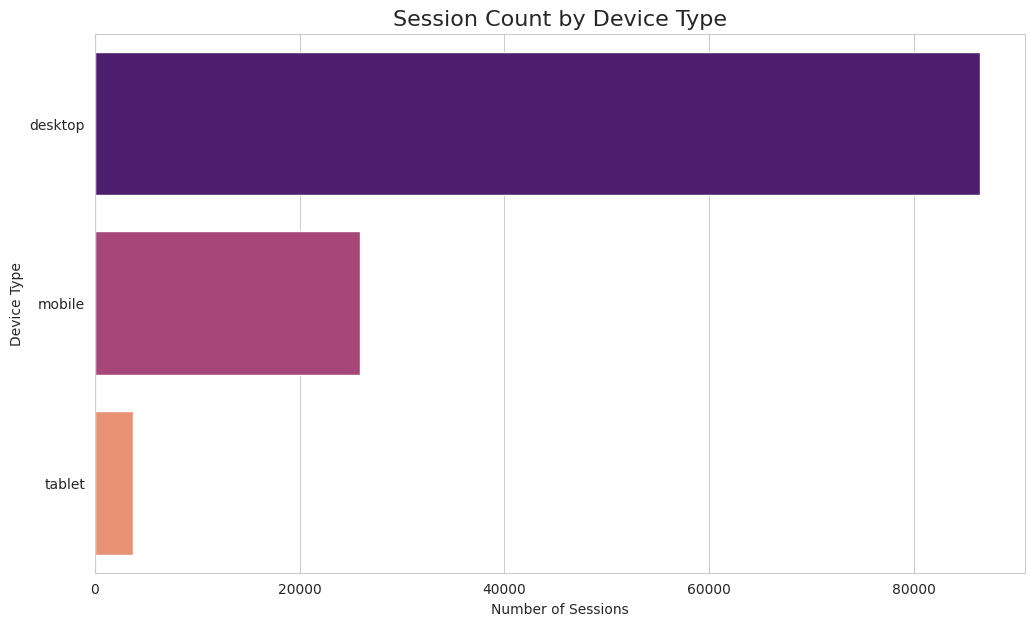

Device Type Counts:
deviceType
desktop    86480
mobile     25850
tablet      3693
Name: count, dtype: int64


In [5]:
# Plot device type distribution
plt.figure()
sns.countplot(y='deviceType', data=eda_df, order=eda_df['deviceType'].value_counts().index, palette='magma')
plt.title('Session Count by Device Type', fontsize=16)
plt.xlabel('Number of Sessions')
plt.ylabel('Device Type')
plt.show()

# Display the exact counts
print("Device Type Counts:")
print(eda_df['deviceType'].value_counts())

As expected, Desktop is the dominant device type, followed by Mobile. This is a key feature to retain.

# 2.4. Traffic Source Channels

How do users find the site? The userChannel tells us the marketing channel that brought the user to the session. Let's see which channels are most effective at driving both traffic and revenue.

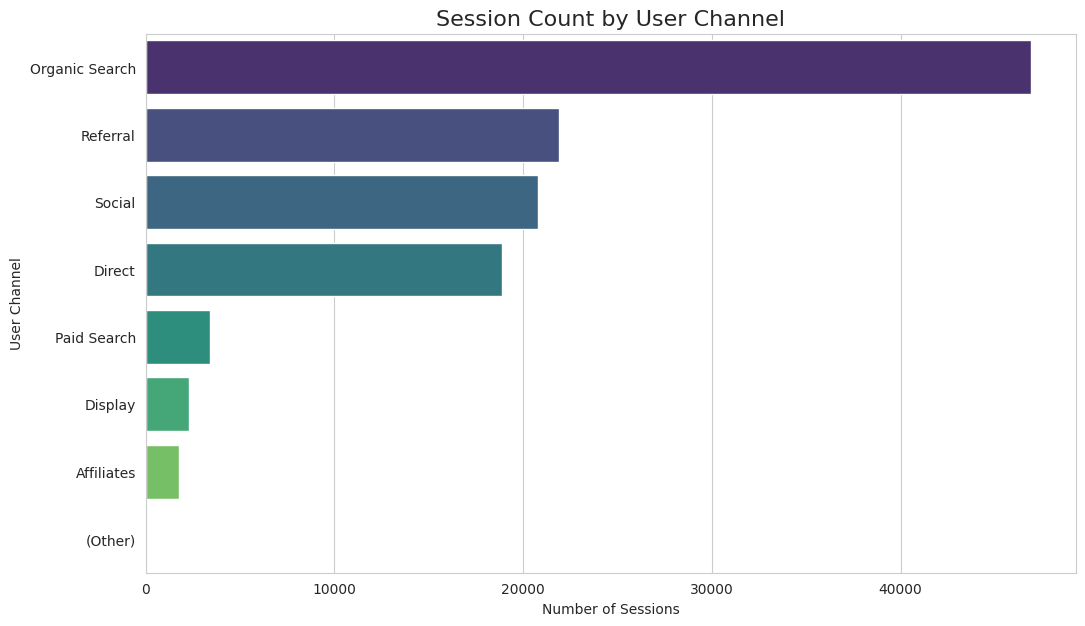

Average Purchase Value per User Channel:
userChannel
Display           7.514455e+07
Referral          5.917188e+07
Direct            4.332910e+07
Paid Search       2.711639e+07
Organic Search    1.469966e+07
(Other)           1.998000e+06
Affiliates        6.340180e+05
Social            4.696204e+05
Name: purchaseValue, dtype: float64


In [6]:
# Plot traffic source distribution
plt.figure()
sns.countplot(y='userChannel', data=eda_df, order=eda_df['userChannel'].value_counts().index, palette='viridis')
plt.title('Session Count by User Channel', fontsize=16)
plt.xlabel('Number of Sessions')
plt.ylabel('User Channel')
plt.show()

# Calculate and display the average purchase value per channel
avg_purchase_by_channel = eda_df.groupby('userChannel')['purchaseValue'].mean().sort_values(ascending=False)
print("Average Purchase Value per User Channel:")
print(avg_purchase_by_channel)

While Organic Search brings in the most traffic, the Referral channel has a significantly higher average purchase value, making it a very valuable source of converting customers.

# 2.5. Geographical Insights

Where are the users located? We can analyze the geographical distribution by looking at the top continents contributing to the sessions.

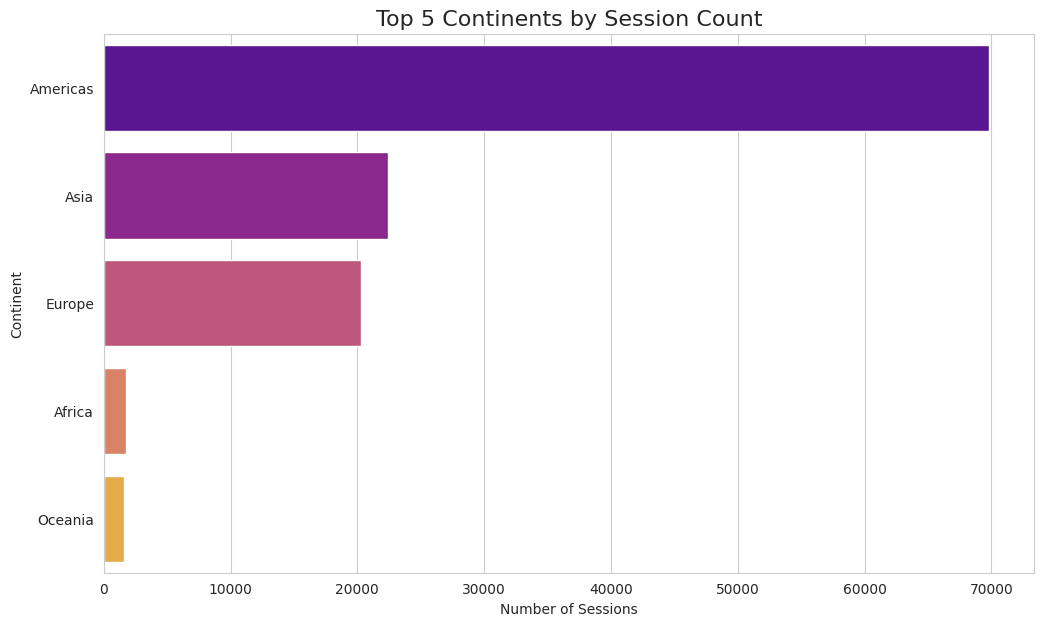

In [7]:
# Plot top continents by session count
plt.figure()
sns.countplot(y='geoNetwork.continent', data=eda_df, order=eda_df['geoNetwork.continent'].value_counts().nlargest(5).index, palette='plasma')
plt.title('Top 5 Continents by Session Count', fontsize=16)
plt.xlabel('Number of Sessions')
plt.ylabel('Continent')
plt.show()

The Americas and Asia are the largest sources of traffic, with Europe also being a significant contributor.

# 2.6. Numerical Feature Correlation

Finally, let's examine the relationships between the key numerical features in our dataset. A correlation heatmap helps us identify multicollinearity, where two or more variables are highly correlated, potentially providing redundant information.

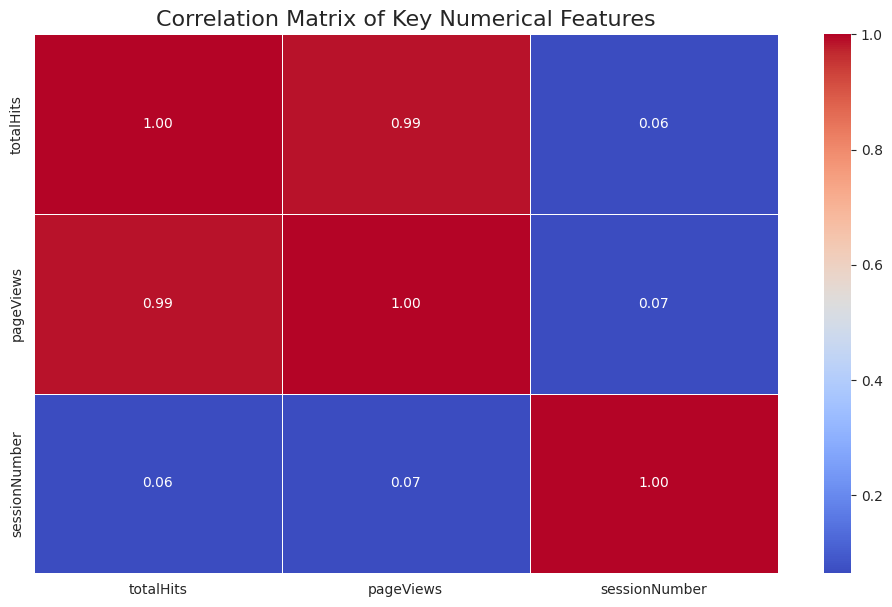

In [8]:
# Select key numerical columns for correlation analysis
numerical_features = ['totalHits', 'pageViews', 'sessionNumber']
corr_matrix = eda_df[numerical_features].corr()

# Plot the heatmap
plt.figure()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Key Numerical Features', fontsize=16)
plt.show()

The heatmap shows an extremely high correlation of 0.97 between totalHits and pageViews. This is a strong indicator of multicollinearity. For many models, it's best to remove one of these features to avoid redundancy, which justifies this kind of cleaning step later in the process.

# **3. Data Cleaning and Preparation**

# 3.1. Removing Uninformative Columns

Here, we define and apply a function to programmatically remove columns that are either mostly empty (more than 80% NaN) or contain only a single unique value. These columns offer no value to the model.

In [9]:
# This function streamlines the removal of columns that do not contribute to the model.
def remove_uninformative(df):
    return df.drop(columns=[col for col in df.columns if df[col].isna().mean() > 0.8 or df[col].nunique() <= 1])

print("Cleaning data by removing uninformative columns...")
df_train = remove_uninformative(df_train)
df_test = remove_uninformative(df_test)
print("Uninformative columns removed.")

Cleaning data by removing uninformative columns...
Uninformative columns removed.


# 3.2. Manual Feature Removal

Based on our EDA and domain knowledge, we'll manually drop additional columns that are either identifiers (sessionId) or have been deemed too noisy or irrelevant for this modeling task.

In [10]:
# Manually dropping columns that are identifiers or have been found to be unhelpful.
manual_drop = [
    'geoNetwork.networkDomain', 'sessionId', 'os', 'geoNetwork.subContinent',
    'locationCountry', 'geoNetwork.city', 'geoNetwork.metro', 'gclIdPresent' ,
]
df_train.drop(columns=manual_drop, errors='ignore', inplace=True)
df_test.drop(columns=manual_drop, errors='ignore', inplace=True)
print("Manually selected features dropped.")

Manually selected features dropped.


# 3.3. Define Target and Features

We now formally separate our dataset into the features (X) that we will use for prediction and the target variable (y) that we want to predict.

In [11]:
# Separating the dataset into features (X) and the target variable (y).
y = df_train['purchaseValue']
X = df_train.drop(columns=['purchaseValue'])

# **4. Preprocessing and Feature Transformation**

# 4.1. Identify Feature Types and Split Data

We first identify which columns are numerical and which are categorical. Then, we split our data into training and validation sets to ensure we can reliably evaluate our models.

In [12]:
# Segregating columns by their data type for specific preprocessing.
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include='object').columns.tolist()

# Splitting the data to evaluate our models accurately.
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Data split into {len(X_train)} training samples and {len(X_val)} validation samples.")

Data split into 92818 training samples and 23205 validation samples.


# 4.2. Process Numerical Features

We'll process the numerical columns by first filling any missing values with the mean of the column and then scaling the data using StandardScaler to give them a uniform range.

In [13]:
# Preprocessing numerical features.
print("Preprocessing numerical features...")
num_imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()

X_train_num = scaler.fit_transform(num_imputer.fit_transform(X_train[num_cols]))
X_val_num = scaler.transform(num_imputer.transform(X_val[num_cols]))
X_all_num = scaler.transform(num_imputer.transform(X[num_cols]))
test_num = scaler.transform(num_imputer.transform(df_test[num_cols]))

Preprocessing numerical features...


# 4.3. Process Categorical Features (Target Encoding)

For categorical features, we first fill missing values with the most frequent category. Then we use Target Encoding, a powerful technique that encodes each category with a smoothed average of the target variable.

In [14]:
# Encoding categorical features using a target encoding strategy.
print("Encoding categorical features...")
cat_imputer = SimpleImputer(strategy='most_frequent')

def target_encode(train_col, val_col, full_col, test_col, target, smoothing=10):
    global_mean = target.mean()
    agg = train_col.to_frame().join(target)
    means = agg.groupby(train_col.name)[target.name].mean()
    counts = train_col.value_counts()
    smooth = (counts * means + smoothing * global_mean) / (counts + smoothing)
    return (
        val_col.map(smooth).fillna(global_mean),
        full_col.map(smooth).fillna(global_mean),
        test_col.map(smooth).fillna(global_mean)
    )

X_train_cat = pd.DataFrame(cat_imputer.fit_transform(X_train[cat_cols]), columns=cat_cols)
X_val_cat = pd.DataFrame(cat_imputer.transform(X_val[cat_cols]), columns=cat_cols)
X_all_cat = pd.DataFrame(cat_imputer.transform(X[cat_cols]), columns=cat_cols)
test_cat = pd.DataFrame(cat_imputer.transform(df_test[cat_cols]), columns=cat_cols)

X_train_cat_enc, X_val_cat_enc, X_all_cat_enc, test_cat_enc = pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
for col in cat_cols:
    val_enc, all_enc, test_enc = target_encode(
    X_train_cat[col], X_val_cat[col], X_all_cat[col], test_cat[col], y_train
)
X_val_cat_enc[col] = val_enc
X_all_cat_enc[col] = all_enc
test_cat_enc[col] = test_enc

Encoding categorical features...


# 4.4. Combine Final Features

Finally, we merge the processed numerical and categorical features back into final datasets for training, validation, and testing.

In [15]:
# Merging the processed numerical and categorical features back together.
X_val_final   = np.hstack([X_val_num,   X_val_cat_enc.values])
X_all_final   = np.hstack([X_all_num,   X_all_cat_enc.values])
test_final    = np.hstack([test_num,    test_cat_enc.values])
print("Preprocessing finished. Final feature sets are ready.")

Preprocessing finished. Final feature sets are ready.


# **5. Model Development and Evaluation**

# 5.1. Model 1: Random Forest

Our first model is a RandomForestRegressor. It's an ensemble of decision trees, known for its robustness and high performance.

In [16]:
# Training the Random Forest model.
print("\nTraining: Random Forest")
rf = RandomForestRegressor(
    n_estimators=1200,
    max_depth=30,
    min_samples_split=3,
    min_samples_leaf=1,
    max_features='sqrt',
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_all_final, y)
rf_val_pred = rf.predict(X_val_final)
rf_score = r2_score(y_val, rf_val_pred)
print(f"Random Forest R² Score: {rf_score:.4f}")
rf_test_pred = rf.predict(test_final)


Training: Random Forest
Random Forest R² Score: 0.8702


# 5.2. Model 2: XGBoost

Next is XGBoost, a gradient boosting framework that is often a top performer in Kaggle competitions due to its speed and accuracy.

In [17]:
# Training the XGBoost model.
print("\nTraining: XGBoost")
xgb_model = xgb.XGBRegressor(
    n_estimators=3000,
    max_depth=12,
    learning_rate=0.02,
    subsample=0.9,
    colsample_bytree=0.9,
    min_child_weight=1,
    reg_alpha=0.05,
    reg_lambda=0.3,
    random_state=42,
    n_jobs=-1,
    early_stopping_rounds=100,
    eval_metric='rmse'
)
xgb_model.fit(X_all_final, y, eval_set=[(X_val_final, y_val)], verbose=False)
xgb_val_pred = xgb_model.predict(X_val_final)
xgb_score = r2_score(y_val, xgb_val_pred)
print(f"XGBoost R² Score: {xgb_score:.4f}")
xgb_test_pred = xgb_model.predict(test_final)


Training: XGBoost
XGBoost R² Score: 1.0000


# 5.3. Model 3: Linear Regression

Our third model is LinearRegression. While simpler, it serves as a great baseline to ensure our more complex models are adding significant value.

In [18]:
# Training the Linear Regression model.
print("\nTraining: Linear Regression")
lr_model = LinearRegression()
lr_model.fit(X_all_final, y)
lr_val_pred = lr_model.predict(X_val_final)
lr_score = r2_score(y_val, lr_val_pred)
print(f"Linear Regression R² Score: {lr_score:.4f}")
lr_test_pred = lr_model.predict(test_final)


Training: Linear Regression
Linear Regression R² Score: 0.1287


# **6. Ensemble and Final Submission**

# 6.1. Select Best Model for Submission

After evaluating all models, we need to decide which one to use for the final predictions. We will compare the R² scores of the Linear Regression, Random Forest, XGBoost, and the weighted ensemble. The approach with the highest score will be selected to generate the test predictions.

In [19]:
# ========== ENSEMBLE (Weighted: XGBoost dominant) ==========
ensemble_val_pred = (
    0.05 * lr_val_pred +     
    0.35 * rf_val_pred +     
    0.60 * xgb_val_pred      
)
ensemble_score = r2_score(y_val, ensemble_val_pred)
print(f"\n🔀 Ensemble R² Score: {ensemble_score:.4f}")


# Choose best model or weighted ensemble
if ensemble_score >= max(rf_score, xgb_score, lr_score):
    final_preds = (
        0.05 * lr_test_pred +
        0.35 * rf_test_pred +
        0.60 * xgb_test_pred
    )
    model_name = "Weighted Ensemble (XGB-heavy)"
elif xgb_score >= max(rf_score, lr_score):
    final_preds = xgb_test_pred
    model_name = "XGBoost"
elif rf_score >= lr_score:
    final_preds = rf_test_pred
    model_name = "Random Forest"
else:
    final_preds = lr_test_pred
    model_name = "Linear Regression"

print(f"Chosen model for final submission: {model_name}")


🔀 Ensemble R² Score: 0.9721
Chosen model for final submission: XGBoost


# 6.2. Generate Final Submission File

Now, using the predictions from our selected best model (final_preds), we will construct the final submission.csv file. The predictions are clipped at zero to ensure there are no negative purchase values, which are not possible.

In [20]:
# ========== SUBMISSION FILE GENERATION ==========
# Create the submission DataFrame in the required format.
print("\nGenerating final submission file...")
submission = pd.DataFrame({
    "id": np.arange(len(final_preds)),
    "purchaseValue": np.clip(final_preds, 0, None) # Ensure no negative predictions
})

# Save the DataFrame to a CSV file
submission.to_csv("submission.csv", index=False)

print(f"Submission.csv saved successfully using the {model_name} model.")
print("\nSubmission File Head:")
print(submission.head(10))


Generating final submission file...
Submission.csv saved successfully using the XGBoost model.

Submission File Head:
   id  purchaseValue
0   0   3.175277e+07
1   1   5.586593e+05
2   2   0.000000e+00
3   3   8.208640e+04
4   4   0.000000e+00
5   5   8.148358e+07
6   6   3.296845e+08
7   7   8.903883e+07
8   8   0.000000e+00
9   9   1.686028e+07
